# 공공데이터 활용

## 경찰청_사이버 금융범죄 현황_20201231

In [1]:
from dotenv import load_dotenv
import os
from pathlib import Path

# .env 파일에 예: PUBLIC_DATA_KEY=your_key

env_path = Path('.') / '.env'
load_dotenv(dotenv_path=env_path, override=True)

PUBLIC_DATA_KEY = os.getenv("PUBLIC_DATA_KEY")
if PUBLIC_DATA_KEY is None:
    raise RuntimeError("PUBLIC_DATA_KEY가 .env에 없습니다.")
# PUBLIC_DATA_KEY


In [2]:
import pandas as pd
import requests

url = f"https://api.odcloud.kr/api/15064566/v1/uddi:7c19feda-2bf7-4927-bb56-c2a50c2e8dcd?page=1&perPage=100&returnType=JSON&serviceKey={PUBLIC_DATA_KEY}"
response = requests.get(url)
datas = response.json()
datas

{'currentCount': 8,
 'data': [{'(사이버금융)기타': 2884,
   '구분': '발생건수',
   '메모리해킹': 9,
   '메신저이용사기': 12402,
   '몸캠피싱': 2583,
   '스미싱': 822,
   '연도': 2020,
   '파밍': 29,
   '피싱': 1519},
  {'(사이버금융)기타': 776,
   '구분': '검거건수',
   '메모리해킹': 6,
   '메신저이용사기': 2873,
   '몸캠피싱': 519,
   '스미싱': 43,
   '연도': 2020,
   '파밍': 16,
   '피싱': 388},
  {'(사이버금융)기타': 2825,
   '구분': '발생건수',
   '메모리해킹': 11,
   '메신저이용사기': 2756,
   '몸캠피싱': 1824,
   '스미싱': 207,
   '연도': 2019,
   '파밍': 45,
   '피싱': 2874},
  {'(사이버금융)기타': 1040,
   '구분': '검거건수',
   '메모리해킹': 3,
   '메신저이용사기': 811,
   '몸캠피싱': 478,
   '스미싱': 32,
   '연도': 2019,
   '파밍': 39,
   '피싱': 984},
  {'(사이버금융)기타': 1742,
   '구분': '발생건수',
   '메모리해킹': 11,
   '메신저이용사기': None,
   '몸캠피싱': 1406,
   '스미싱': 293,
   '연도': 2018,
   '파밍': 191,
   '피싱': 1978},
  {'(사이버금융)기타': 857,
   '구분': '검거건수',
   '메모리해킹': 5,
   '메신저이용사기': None,
   '몸캠피싱': 281,
   '스미싱': 174,
   '연도': 2018,
   '파밍': 100,
   '피싱': 936},
  {'(사이버금융)기타': 1675,
   '구분': '발생건수',
   '메모리해킹': 12,
   '메신저이용사기': None,
   

In [3]:
df1 = pd.DataFrame(datas['data'])
df1.head()

,(사이버금융)기타,구분,메모리해킹,메신저이용사기,몸캠피싱,스미싱,연도,파밍,피싱
0,2884,발생건수,9,12402.0,2583,822,2020,29,1519
1,776,검거건수,6,2873.0,519,43,2020,16,388
2,2825,발생건수,11,2756.0,1824,207,2019,45,2874
3,1040,검거건수,3,811.0,478,32,2019,39,984
4,1742,발생건수,11,NaN,1406,293,2018,191,1978


In [4]:
len(df1)

8

## 경찰청_사이버 금융범죄 현황_20240430

In [5]:
url = f"https://api.odcloud.kr/api/15064566/v1/uddi:311fe198-a727-4bf5-8f5d-a7999483db20?page=1&perPage=100&returnType=JSON&serviceKey={PUBLIC_DATA_KEY}"
response = requests.get(url)
datas = response.json() 
df2 = pd.DataFrame(datas['data'])
df2.head()

,구분,메모리해킹,메신저이용사기,사이버금융 기타,연도,파밍,피싱
0,발생건수,14,3683,2005,2024,11,12810
1,검거건수,6,681,443,2024,4,193
2,발생건수,19,13179,4501,2023,38,3645
3,검거건수,2,2923,1671,2023,8,733
4,발생건수,14,15856,4516,2022,20,3028


In [6]:
print(df1.columns)
print(df2.columns)

Index(['(사이버금융)기타', '구분', '메모리해킹', '메신저이용사기', '몸캠피싱', '스미싱', '연도', '파밍', '피싱'], dtype='object')
Index(['구분', '메모리해킹', '메신저이용사기', '사이버금융 기타', '연도', '파밍', '피싱'], dtype='object')


In [7]:
df1 = df1.rename(columns={'(사이버금융)기타': '사이버금융 기타'})
df1.columns

Index(['사이버금융 기타', '구분', '메모리해킹', '메신저이용사기', '몸캠피싱', '스미싱', '연도', '파밍', '피싱'], dtype='object')

In [8]:
df1 = df1.sort_index(axis=1)
df2 = df2.sort_index(axis=1)

In [9]:
df1['사이버금융 기타'] = df1['스미싱'] + df1['몸캠피싱'] + df1['사이버금융 기타']
df1.head()

,구분,메모리해킹,메신저이용사기,몸캠피싱,사이버금융 기타,스미싱,연도,파밍,피싱
0,발생건수,9,12402.0,2583,6289,822,2020,29,1519
1,검거건수,6,2873.0,519,1338,43,2020,16,388
2,발생건수,11,2756.0,1824,4856,207,2019,45,2874
3,검거건수,3,811.0,478,1550,32,2019,39,984
4,발생건수,11,NaN,1406,3441,293,2018,191,1978


In [10]:
df1 = df1.drop(['스미싱', '몸캠피싱'], axis=1)
df1.head()

,구분,메모리해킹,메신저이용사기,사이버금융 기타,연도,파밍,피싱
0,발생건수,9,12402.0,6289,2020,29,1519
1,검거건수,6,2873.0,1338,2020,16,388
2,발생건수,11,2756.0,4856,2019,45,2874
3,검거건수,3,811.0,1550,2019,39,984
4,발생건수,11,NaN,3441,2018,191,1978


In [11]:
df = pd.concat([df1, df2], axis=0)

In [12]:
df = df.fillna(0)
df.reset_index(drop=True, inplace=True)

In [13]:
df

,구분,메모리해킹,메신저이용사기,사이버금융 기타,연도,파밍,피싱
0,발생건수,9,12402.0,6289,2020,29,1519
1,검거건수,6,2873.0,1338,2020,16,388
2,발생건수,11,2756.0,4856,2019,45,2874
3,검거건수,3,811.0,1550,2019,39,984
4,발생건수,11,0.0,3441,2018,191,1978
5,검거건수,5,0.0,1312,2018,100,936
6,발생건수,12,0.0,3576,2017,1933,545
7,검거건수,6,0.0,1326,2017,946,354
8,발생건수,14,3683.0,2005,2024,11,12810
9,검거건수,6,681.0,443,2024,4,193


- 년도별로 발생건수와 검거건수를 사이버 범죄 유형별로 추이를 보고 싶을 때

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df = 기존 데이터프레임

# 1) 범죄 항목 컬럼 목록
crime_cols = ['메모리해킹', '메신저이용사기', '사이버금융 기타', '파밍', '피싱']

# 2) Melt 변환
df_long = df.melt(
    id_vars=['연도', '구분'], 
    value_vars=crime_cols,
    var_name='범죄종류',
    value_name='건수'
)

In [15]:
df_long

,연도,구분,범죄종류,건수
0,2020,발생건수,메모리해킹,9.0
1,2020,검거건수,메모리해킹,6.0
2,2019,발생건수,메모리해킹,11.0
3,2019,검거건수,메모리해킹,3.0
4,2018,발생건수,메모리해킹,11.0
...,...,...,...,...
105,2020,검거건수,피싱,388.0
106,2019,발생건수,피싱,2874.0
107,2019,검거건수,피싱,984.0
108,2018,발생건수,피싱,1978.0


In [23]:
# config.py 파일로 저장
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['Malgun Gothic', 'NanumGothic']
plt.rcParams['axes.unicode_minus'] = False

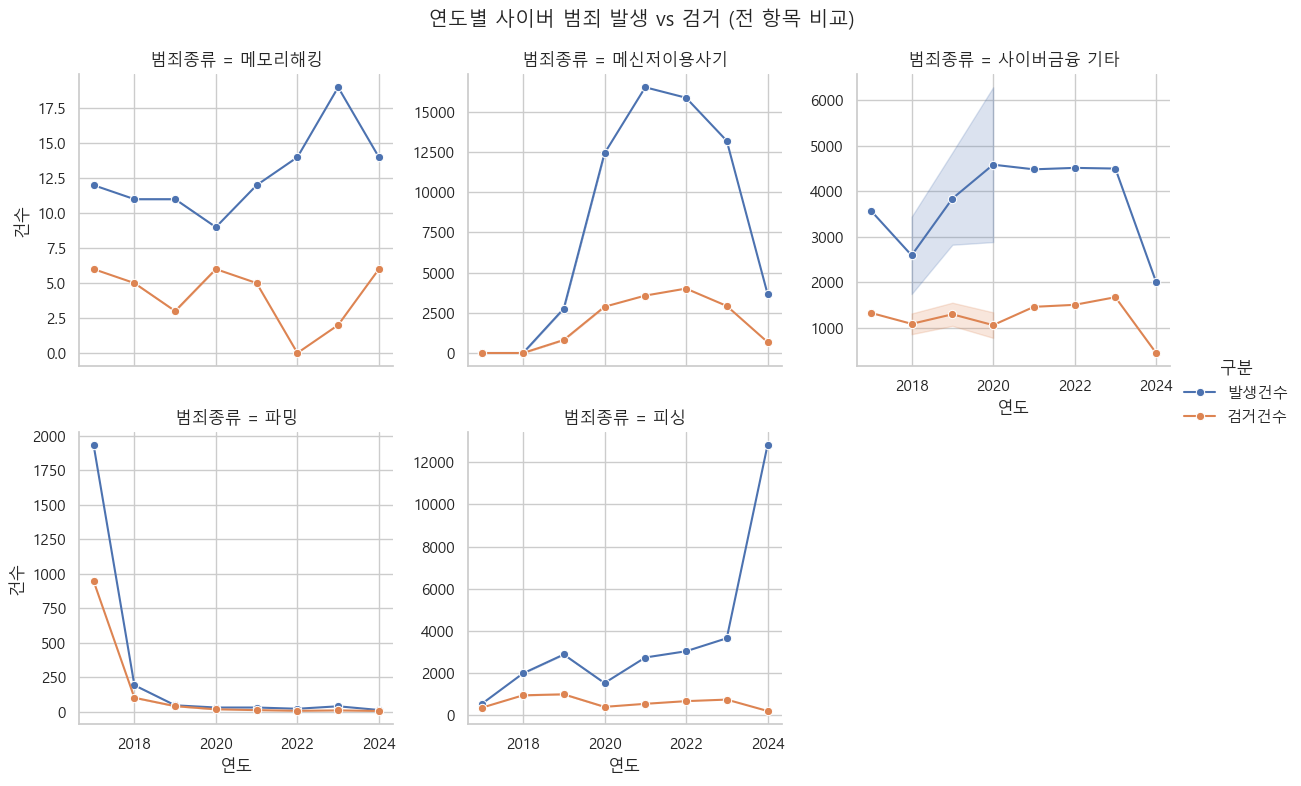

In [27]:
warnings.filterwarnings('ignore')

# Seaborn 스타일 설정할 때 폰트도 함께 설정
sns.set(style="whitegrid", 
        font="Malgun Gothic",  # 이거 추가!
        rc={'axes.unicode_minus': False})

# 여러 개의 서브플롯을 자동으로 생성, 데이터의 여러 범주를 한눈에 비교
g = sns.FacetGrid(
    df_long,              # 데이터프레임
    col="범죄종류",        # 열 기준으로 나눔
    hue="구분",           # 색상 구분
    sharey=False,         # Y축 공유 여부
    col_wrap=3,           # 한 줄에 3개씩
    height=4              # 각 그래프 높이
)
g.map(sns.lineplot, "연도", "건수", marker="o")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("연도별 사이버 범죄 발생 vs 검거 (전 항목 비교)")
plt.show()
